<a href="https://colab.research.google.com/github/souhila98/Reducing-car-hijacking-in-South-Africa-using-machine-learning/blob/main/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import gensim
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel, LsiModel, HdpModel
import matplotlib.pyplot as plt
import os

In [ ]:
df = pd.read_csv('/processed_data.csv')


In [ ]:
df.head()

,Unnamed: 0,Datetime,Text,Text_token,Text_string,Text_string_fdist,Text_string_lem
0,0,2022-11-23 12:48:29+00:00,sa has new hijacking hotspot and a 305 increa...,"['sa', 'new', 'hijacking', 'hotspot', '305', '...",new hijacking hotspot 305 increase area crime ...,new hijacking hotspot increase area crime stat...,new hijacking hotspot increase area crime stat...
1,1,2022-11-22 19:27:52+00:00,madibapinky rented abramjee in south afri...,"['madibapinky', 'rented', 'abramjee', 'south',...",madibapinky rented abramjee south africa sis l...,abramjee south africa lost loved one april sus...,abramjee south africa lost loved one april sus...
2,2,2022-11-22 14:58:34+00:00,thai nguyen speaks after scary robbery h...,"['thai', 'nguyen', 'speaks', 'scary', 'robbery...",thai nguyen speaks scary robbery hijacking hij...,thai speaks scary robbery hijacking hijacking ...,thai speaks scary robbery hijacking hijacking ...
3,3,2022-11-16 23:49:42+00:00,vehicle tracker when we say majority of zimb...,"['vehicle', 'tracker', 'say', 'majority', 'zim...",vehicle tracker say majority zimbabwe south af...,vehicle tracker say majority zimbabwe south af...,vehicle tracker say majority zimbabwe south af...
4,4,2022-11-16 13:10:12+00:00,re daily mail south africa where you go to g...,"['daily', 'mail', 'south', 'africa', 'go', 'ge...",daily mail south africa get killed raped nothi...,daily mail south africa get killed raped nothi...,daily mail south africa get killed raped nothi...


In [ ]:
import spacy
nlp = spacy.load('en_core_web_md')
# Tags I want to remove from the text
removal= ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
tokens = []
for summary in nlp.pipe(df['Text_string_lem']):
    proj_tok = [token.lemma_.lower() for token in summary if token.pos_ not in removal and not token.is_stop and token.is_alpha]
    tokens.append(proj_tok)

In [ ]:
df['Text_string_lem'] = tokens
df['Text_string_lem'] 

0       [new, hijacking, hotspot, increase, area, crim...
1       [abramjee, south, africa, lose, love, april, s...
2       [thai, speak, scary, robbery, hijacking, hijac...
3       [vehicle, tracker, majority, zimbabwe, south, ...
4       [daily, mail, south, africa, kill, rape, gets,...
                              ...                        
4851    [car, hijack, victim, nightmare, south, africa...
4852    [south, africa, car, hijack, victim, nightmare...
4853    [hijack, suspect, arrest, car, chase, man, arr...
4854           [southafrica, robber, hijack, police, car]
4855    [stuff, happen, south, africa, armed, bandit, ...
Name: Text_string_lem, Length: 4856, dtype: object

In [ ]:
dictionary = Dictionary(df['Text_string_lem'])
print(dictionary.token2id)

{'africa': 0, 'area': 1, 'crime': 2, 'here': 3, 'hijacking': 4, 'hotspot': 5, 'increase': 6, 'new': 7, 'release': 8, 'south': 9, 'stat': 10, 'wednesday': 11, 'abramjee': 12, 'april': 13, 'car': 14, 'lose': 15, 'love': 16, 'pic': 17, 'suspect': 18, 'go': 19, 'hijack': 20, 'incident': 21, 'know': 22, 'news': 23, 'people': 24, 'robbery': 25, 'say': 26, 'scary': 27, 'speak': 28, 'thai': 29, 'tomorrow': 30, 'trauma': 31, 'victim': 32, 'want': 33, 'call': 34, 'hope': 35, 'kill': 36, 'like': 37, 'majority': 38, 'name': 39, 'owner': 40, 'peace': 41, 'ppl': 42, 'terrorist': 43, 'tracker': 44, 'vehicle': 45, 'zimbabwe': 46, 'an': 47, 'business': 48, 'daily': 49, 'destroy': 50, 'gets': 51, 'hold': 52, 'home': 53, 'law': 54, 'mail': 55, 'order': 56, 'police': 57, 'rape': 58, 'thing': 59, 'traffic': 60, 'load': 61, 'real': 62, 'shed': 63, 'tell': 64, 'border': 65, 'move': 66, 'operate': 67, 'syndicate': 68, 'country': 69, 'drive': 70, 'risk': 71, 'toyota': 72, 'accord': 73, 'bei': 74, 'breakingnew'

In [ ]:
corpus = [dictionary.doc2bow(doc) for doc in df['Text_string_lem']]

In [ ]:
print(corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1)], [(0, 1), (4, 1), (9, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)], [(0, 1), (4, 1), (9, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 1)], [(0, 1), (9, 1), (14, 1), (20, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1)], [(0, 1), (9, 1), (20, 1), (36, 1), (47, 1), (48, 1), (49, 2), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1)], [(0, 1), (2, 1), (9, 1), (20, 1), (61, 1), (62, 1), (63, 1), (64, 1)], [(0, 1), (9, 1), (20, 1), (65, 1), (66, 1), (67, 1), (68, 1)], [(0, 1), (9, 1), (20, 1), (24, 1), (69, 2), (70, 1), (71, 1), (72, 1)], [(2, 1), (4, 1), (19, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 3), (81, 2), (82, 1), (83

In [ ]:
from gensim.models import LdaMulticore
lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=5, workers = 4, passes=10)

In [ ]:
lda_model.print_topics(-1)

[(0,
  '0.062*"south" + 0.052*"africa" + 0.035*"hijack" + 0.018*"car" + 0.016*"hijacking" + 0.015*"crime" + 0.014*"people" + 0.013*"african" + 0.013*"country" + 0.013*"drug"'),
 (1,
  '0.108*"africa" + 0.108*"south" + 0.064*"hijacking" + 0.035*"hijack" + 0.010*"video" + 0.010*"attempt" + 0.009*"crime" + 0.008*"car" + 0.008*"vehicle" + 0.007*"victim"'),
 (2,
  '0.093*"africa" + 0.091*"south" + 0.055*"hijack" + 0.047*"hijacking" + 0.032*"car" + 0.017*"truck" + 0.016*"arrest" + 0.013*"property" + 0.012*"man" + 0.012*"security"'),
 (3,
  '0.096*"africa" + 0.086*"south" + 0.065*"hijacking" + 0.031*"hijack" + 0.030*"crime" + 0.022*"car" + 0.017*"vehicle" + 0.015*"high" + 0.014*"rise" + 0.013*"rate"'),
 (4,
  '0.104*"africa" + 0.103*"south" + 0.083*"hijacking" + 0.029*"hijack" + 0.016*"hotspot" + 0.016*"murder" + 0.016*"bad" + 0.015*"crime" + 0.014*"new" + 0.014*"trend"')]

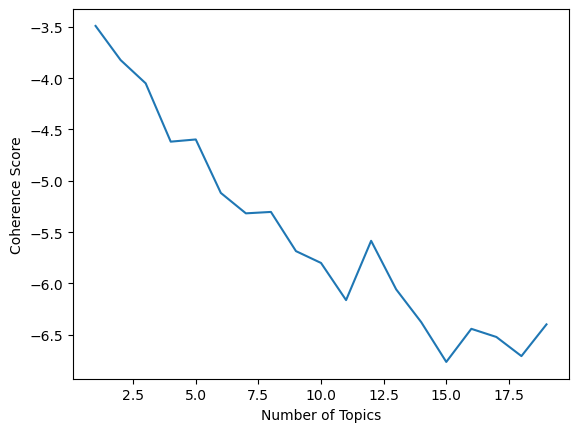

In [ ]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, corpus=corpus, dictionary=dictionary, coherence='u_mass')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

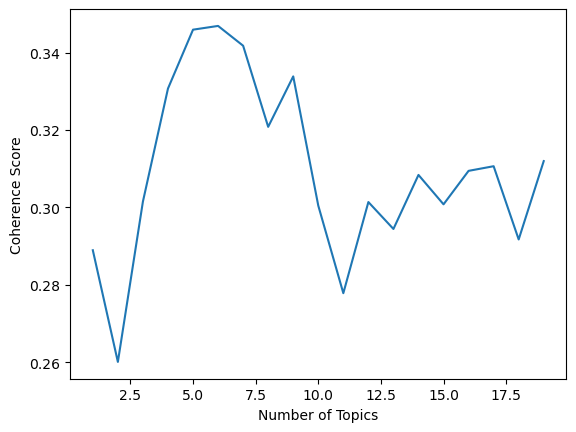

In [ ]:
topics = []
score = []
for i in range(1,20,1):
   lda_model = LdaMulticore(corpus=corpus, id2word=dictionary, iterations=10, num_topics=i, workers = 4, passes=10, random_state=100)
   cm = CoherenceModel(model=lda_model, texts =  df['Text_string_lem'], corpus=corpus, dictionary=dictionary, coherence='c_v')
   topics.append(i)
   score.append(cm.get_coherence())
_=plt.plot(topics, score)
_=plt.xlabel('Number of Topics')
_=plt.ylabel('Coherence Score')
plt.show()

In [ ]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))


Perplexity:  -6.102157924509407


In [ ]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['Text_string_lem'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3119802590053965


In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
#lda_display = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
lda_viz = gensimvis.prepare(lda_model, corpus, dictionary)

pyLDAvis.display(lda_viz)

C:\Users\Pctec\anaconda3\envs\tensorflow\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
C:\Users\Pctec\anaconda3\envs\tensorflow\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
